In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import os
from pandas.core.frame import DataFrame 
import seaborn as sns

In [3]:
sid = SentimentIntensityAnalyzer()

def evaluate_sentiments(input_filname):
    # List that holds the resturant and score 
    restaurant = []
    score = []
    # Read the csv from file location
    df = pd.read_csv(os.path.join(input_filname), delimiter="|", header=1)
    for index, row in df.iterrows():
        topics_list = row[1].split(",")
        # Initalize variables
        sum = 0
        average = 0
        compound_score = 0 
        
        # Loop for each topic
        for topic in topics_list:
            # Sum of each compound score 
            sum += sid.polarity_scores(topic)['compound'] 
        # Retrieve Average
        average = sum / len(topics_list)
        # Retrieve Resturant Name
        restaurant_name = row[0].split('_processed.csv')[0]
        # Replace Resturant name with space for every -
        restaurant_name = restaurant_name.replace("-", " ")
        # Capitalize every word
        restaurant_name = restaurant_name.title()
        # Retrieve the rounded compound score of 3 digits 
        compound_score = round(average,3)
        # Add resturant name to list
        restaurant.append(restaurant_name)
        # Add score to list
        score.append(compound_score)
        
    # Create empty Data Frame
    df = pd.DataFrame()
    # Create column called Restaurant Name
    df['Restaurant Name'] = restaurant
    # Create column called Compound Score
    df['Compound Score'] = score
    # Convert DF to CSV
    df.to_csv('../dataset/rss_kmeans.csv', index=False)
    return df

In [4]:
# Data set of topics to search through
df = evaluate_sentiments("../dataset/restaurant_with_topics_kmeans.csv")

In [5]:
# Retrieve top 10 sorted by compound score
df2 = df.sort_values(by=['Compound Score'], ascending = False).head(10)

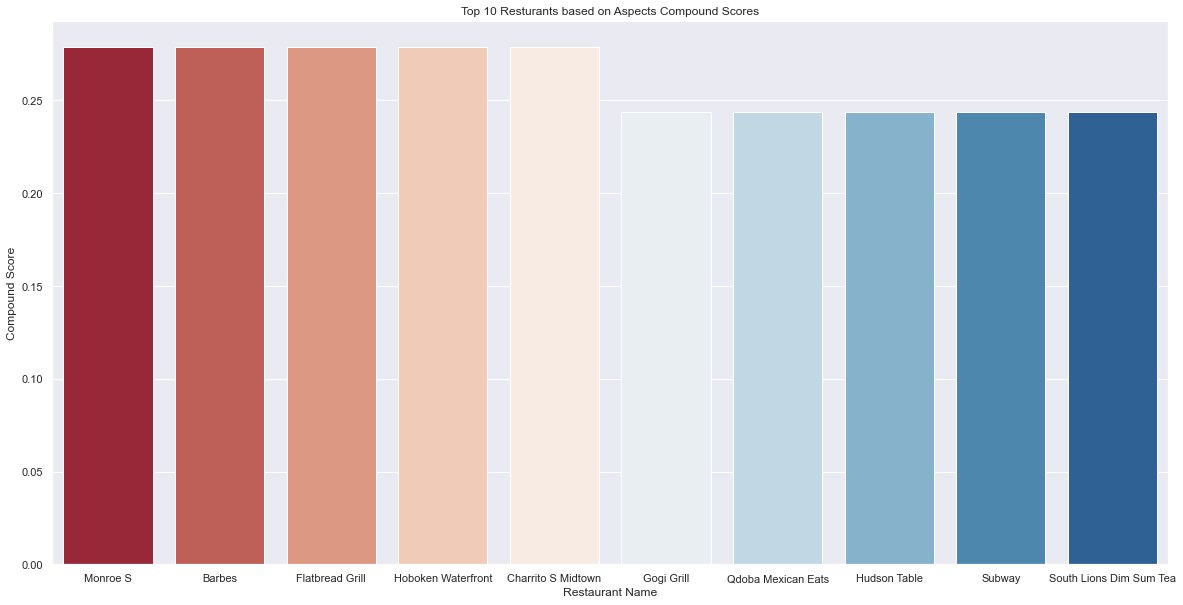

In [7]:
# Graph using Seaborn
sns.barplot(data=df2, x='Restaurant Name', y='Compound Score', palette='RdBu').set(title = 'Top 10 Resturants based on Aspects Compound Scores')
sns.set(rc={'figure.figsize':(20,10)})